In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

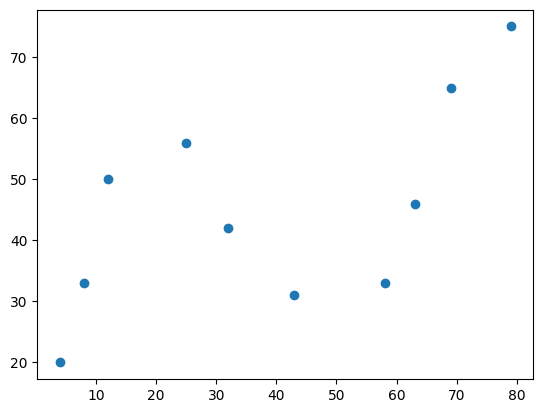

In [3]:
plt.scatter(x, y)

In [4]:
def func(p, x):
    # 根据公式，定义 2 次多项式函数
    w0, w1, w2 = p
    f = w0 + w1 * x + w2 * x * x
    return f


def err_func(p, x, y):
    # 残差函数（观测值与拟合值之间的差距）
    ret = func(p, x) - y
    return ret

In [6]:

import numpy as np
from scipy.optimize import leastsq

scipy.optimize.leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0, ftol=1.49012e-8, xtol=1.49012e-8, gtol=0.0, maxfev=0, epsfcn=None, factor=100, diag=None)

参数
func: 计算残差的函数，形如 func(x, *args)，其中 x 是拟合参数数组，args 是额外的参数。
x0: 初始拟合参数的估计值数组。
args: 传递给 func 的额外参数元组。
Dfun: （可选）用户提供的雅可比矩阵的函数，形如 Dfun(x, *args)。
full_output: （可选）如果为 True，函数将返回额外的输出信息。
col_deriv: （可选）如果为 True，雅可比矩阵按列排列。
ftol: （可选）目标函数值收敛的相对误差。
xtol: （可选）解的相对误差。
gtol: （可选）梯度的正则化参数。
maxfev: （可选）允许的最大函数调用次数。
epsfcn: （可选）用于数值差分计算雅可比矩阵的步长。
factor: （可选）用于确定步长的参数。
diag: （可选）对角缩放因子数组。
返回值
返回一个包含以下内容的元组：

x: 拟合参数的最佳估计值。
cov_x: （如果 full_output 为 True）参数的协方差矩阵。
infodict: （如果 full_output 为 True）包含解的信息的字典。
mesg: （如果 full_output 为 True）描述收敛情况的消息。
ier: 收敛标志，0 表示未收敛，1 表示收敛。
示例

In [7]:
p_init = np.random.randn(3)  # 生成 3 个随机数
# 使用 Scipy 提供的最小二乘法函数得到最佳拟合参数
parameters = leastsq(err_func,p_init,args=(np.array(x), np.array(y)))

print("Fitting Parameters: ", parameters[0])

Fitting Parameters:  [ 3.76893111e+01 -2.60474096e-01  8.00078020e-03]


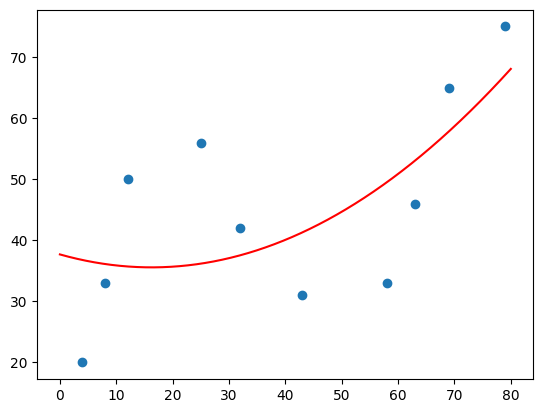

In [8]:
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制拟合函数曲线
plt.plot(x_temp, func(parameters[0], x_temp), "r")

# 绘制原数据点
plt.scatter(x, y)




 ## 使用 np.poly1d()

In [9]:
def fit_func(p, x):
    """根据公式，定义 n 次多项式函数"""
    f = np.poly1d(p)
    return f(x)


def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）"""
    ret = fit_func(p, x) - y
    return ret


def n_poly(n):
    """n 次多项式拟合"""
    p_init = np.random.randn(n)  # 生成 n 个随机数
    parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
    return parameters[0]


In [10]:
n_poly(3)

array([ 8.00078124e-03, -2.60474186e-01,  3.76893123e+01])

Text(0.5, 1.0, 'm = 8')

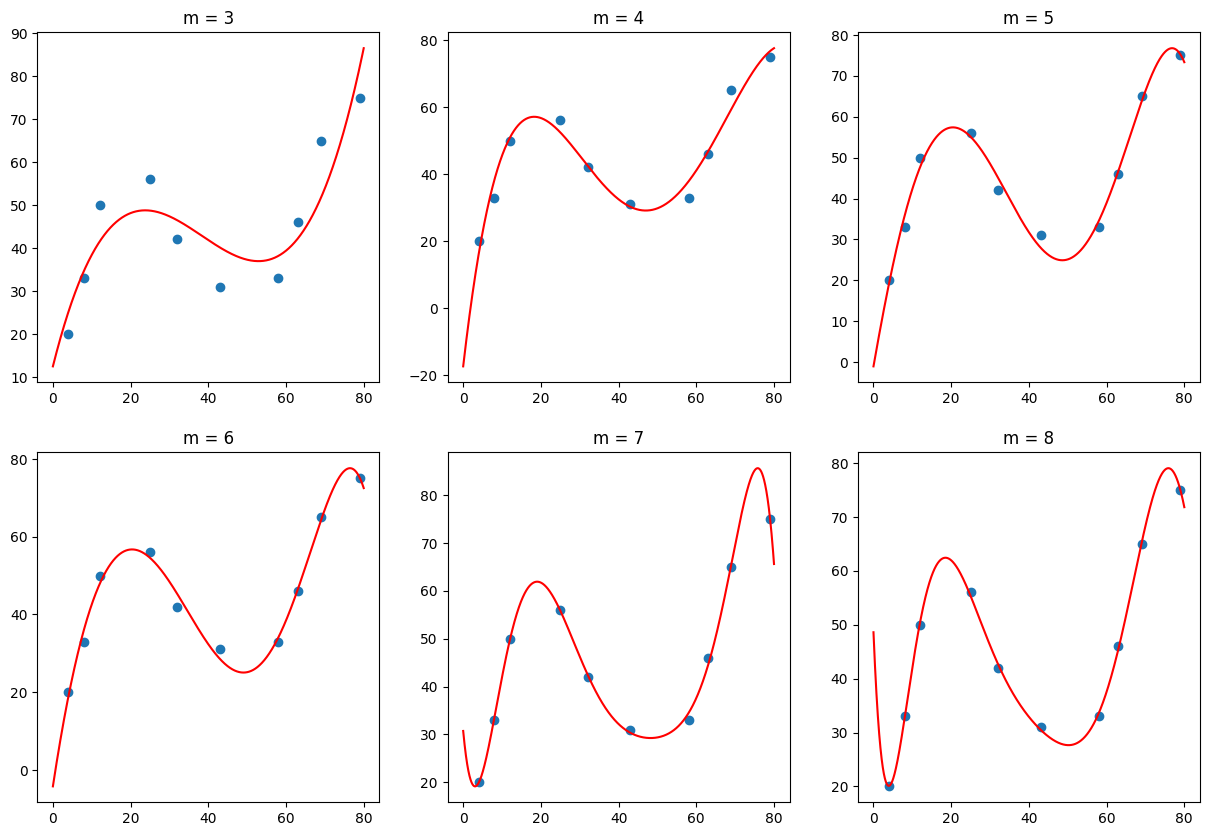

In [11]:
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(x_temp, fit_func(n_poly(4), x_temp), "r")
axes[0, 0].scatter(x, y)
axes[0, 0].set_title("m = 3")

axes[0, 1].plot(x_temp, fit_func(n_poly(5), x_temp), "r")
axes[0, 1].scatter(x, y)
axes[0, 1].set_title("m = 4")

axes[0, 2].plot(x_temp, fit_func(n_poly(6), x_temp), "r")
axes[0, 2].scatter(x, y)
axes[0, 2].set_title("m = 5")

axes[1, 0].plot(x_temp, fit_func(n_poly(7), x_temp), "r")
axes[1, 0].scatter(x, y)
axes[1, 0].set_title("m = 6")

axes[1, 1].plot(x_temp, fit_func(n_poly(8), x_temp), "r")
axes[1, 1].scatter(x, y)
axes[1, 1].set_title("m = 7")

axes[1, 2].plot(x_temp, fit_func(n_poly(9), x_temp), "r")
axes[1, 2].scatter(x, y)
axes[1, 2].set_title("m = 8")

## sklearn.preprocessing.PolynomialFeatures() 